# Skip-Gram Implementation

In [150]:
# import necessary libraries
import numpy as np
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [151]:
# Step 1: Load the text corpus
sentences = []
with open('file.txt', 'r') as f:
    for line in f:
        sentences.append(line.strip().split('.'))

# Step 2: Preprocess the text corpus
corpus=[]
# Iterate through the list of sentences, break them into lists of words and remove the empty strings
for i in range(len(sentences)):
    sentences[i] = sentences[i][0].split(' ')

    # strip the words of any special characters
    sentences[i] = [word.strip(',?;"!').lower() for word in sentences[i]]

    sentences[i] = list(filter(None, sentences[i]))
    if(len(sentences[i])>0):
        corpus.append(sentences[i])

print(corpus)


[['once', 'upon', 'a', 'time', 'two', 'little', 'fairies', 'from', 'magic', 'land', 'ventured', 'out', 'into', 'the', 'wide', 'world'], ['his', 'friend', 'lily-bell', 'was', 'completely', 'different', 'from', 'him', 'for', 'she', 'was', 'so', 'kind', 'and', 'friendly', 'that', 'everyone', 'loved', 'her'], ['“i’m', 'tired', 'and', 'thirsty,”', 'said', 'thistledown'], ['“dear', 'thistledown', 'be', 'kind', 'to', 'these', 'flowers', 'and', 'don’t', 'tease', 'them'], ['thistledown', 'laughed', 'and', 'then', 'he', 'took', 'the', 'honey', 'from', 'the', 'violets', 'and', 'shook', 'the', 'purple', 'bells', 'vigorously', 'to', 'get', 'all', 'their', 'dew', 'for', 'his', 'bath'], ['finally', 'he', 'came', 'to', 'a', 'very', 'lovely', 'rose', 'bush', 'with', 'one', 'rose', 'in', 'full', 'bloom', 'and', 'a', 'bud'], ['“little', 'rosebud', 'why', 'do', 'you', 'grow', 'so', 'slowly', 'you', 'are', 'now', 'too', 'old', 'to', 'stay', 'rocking', 'in', 'your', 'green', 'cradle'], ['“no', 'my', 'bud', 

In [152]:
# Step 3: Build the vocabulary
vocab = []
for sentence in corpus:
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

vocab_size = len(vocab)

# Step 4: Build the training data (skip-gram pairs)
# Build the training data by creating a list of tuples of the form (current_word, context_word)
context_size = 2            
word_pairs = []
for sentence in corpus:
    for i in range(len(sentence)):
        for j in range(i-context_size, i+context_size+1):
            if j>=0 and j<len(sentence) and j!=i:
                word_pairs.append([sentence[i], sentence[j]])

print(word_pairs)

[['once', 'upon'], ['once', 'a'], ['upon', 'once'], ['upon', 'a'], ['upon', 'time'], ['a', 'once'], ['a', 'upon'], ['a', 'time'], ['a', 'two'], ['time', 'upon'], ['time', 'a'], ['time', 'two'], ['time', 'little'], ['two', 'a'], ['two', 'time'], ['two', 'little'], ['two', 'fairies'], ['little', 'time'], ['little', 'two'], ['little', 'fairies'], ['little', 'from'], ['fairies', 'two'], ['fairies', 'little'], ['fairies', 'from'], ['fairies', 'magic'], ['from', 'little'], ['from', 'fairies'], ['from', 'magic'], ['from', 'land'], ['magic', 'fairies'], ['magic', 'from'], ['magic', 'land'], ['magic', 'ventured'], ['land', 'from'], ['land', 'magic'], ['land', 'ventured'], ['land', 'out'], ['ventured', 'magic'], ['ventured', 'land'], ['ventured', 'out'], ['ventured', 'into'], ['out', 'land'], ['out', 'ventured'], ['out', 'into'], ['out', 'the'], ['into', 'ventured'], ['into', 'out'], ['into', 'the'], ['into', 'wide'], ['the', 'out'], ['the', 'into'], ['the', 'wide'], ['the', 'world'], ['wide', '

In [153]:
def get_one_hot_encoding(word):
    one_hot_encoding = np.zeros(len(vocab))
    one_hot_encoding[vocab.index(word)] = 1
    return one_hot_encoding

In [154]:
# Step 5: Build the skip-gram model architecture
# Define the hyperparameters
embed_size = 5
learning_rate = 0.001
epochs = 30

# Define the model architecture
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(SkipGram, self).__init__()  # Call the parent class constructor
        self.embeddings = nn.Embedding(vocab_size, embed_size)      # input -> hidden
        self.linear1 = nn.Linear(embed_size, vocab_size)            # hidden -> output

    def forward(self, x):
        embeds = self.embeddings(x)
        out = self.linear1(embeds)
        probs = nn.functional.log_softmax(out, dim=1)
        return probs
    
model = SkipGram(vocab_size, embed_size)


In [155]:
# Step 6: Train the model

# Define the loss function and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(epochs):
    total_loss = 0
    for context, target in word_pairs:
    
        context_var = Variable(torch.LongTensor([vocab.index(target)])) # shape: [1]
        target_var = torch.LongTensor(get_one_hot_encoding(context))    # shape: [vocab_size]

        optimizer.zero_grad()  # Clear gradients
        
        # Forward pass
        probs = model(context_var).squeeze(0)  # shape: [1, vocab_size] -> [vocab_size]
        # print(probs.shape, target_var.shape)        # shape: [vocab_size]
        loss = loss_function(probs, target_var)
        total_loss += loss.item()  # Accumulate the loss

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()
        
    print('Epoch:', epoch, 'Loss:', total_loss)

Epoch: 0 Loss: 22830.519209764898
Epoch: 1 Loss: 2904.293902680278
Epoch: 2 Loss: 887.5541939269751
Epoch: 3 Loss: 499.56214855611324
Epoch: 4 Loss: 349.6127090668306
Epoch: 5 Loss: 271.002240434289
Epoch: 6 Loss: 222.81184388697147
Epoch: 7 Loss: 190.30864393059164
Epoch: 8 Loss: 166.93192701227963
Epoch: 9 Loss: 149.3364599184133
Epoch: 10 Loss: 135.6229427275248
Epoch: 11 Loss: 124.6377820270136
Epoch: 12 Loss: 115.65043970337138
Epoch: 13 Loss: 108.1635544039309
Epoch: 14 Loss: 101.8308932366781
Epoch: 15 Loss: 96.40232355473563
Epoch: 16 Loss: 91.70998940058053
Epoch: 17 Loss: 87.60965404333547
Epoch: 18 Loss: 83.97995466180146
Epoch: 19 Loss: 80.77945509925485
Epoch: 20 Loss: 77.90498950821348
Epoch: 21 Loss: 75.31563480198383
Epoch: 22 Loss: 72.97971213469282
Epoch: 23 Loss: 70.8635514776688
Epoch: 24 Loss: 68.93082608375698
Epoch: 25 Loss: 67.15746168303303
Epoch: 26 Loss: 65.53310835477896
Epoch: 27 Loss: 64.03435531607829
Epoch: 28 Loss: 62.63529499527067
Epoch: 29 Loss: 61.3

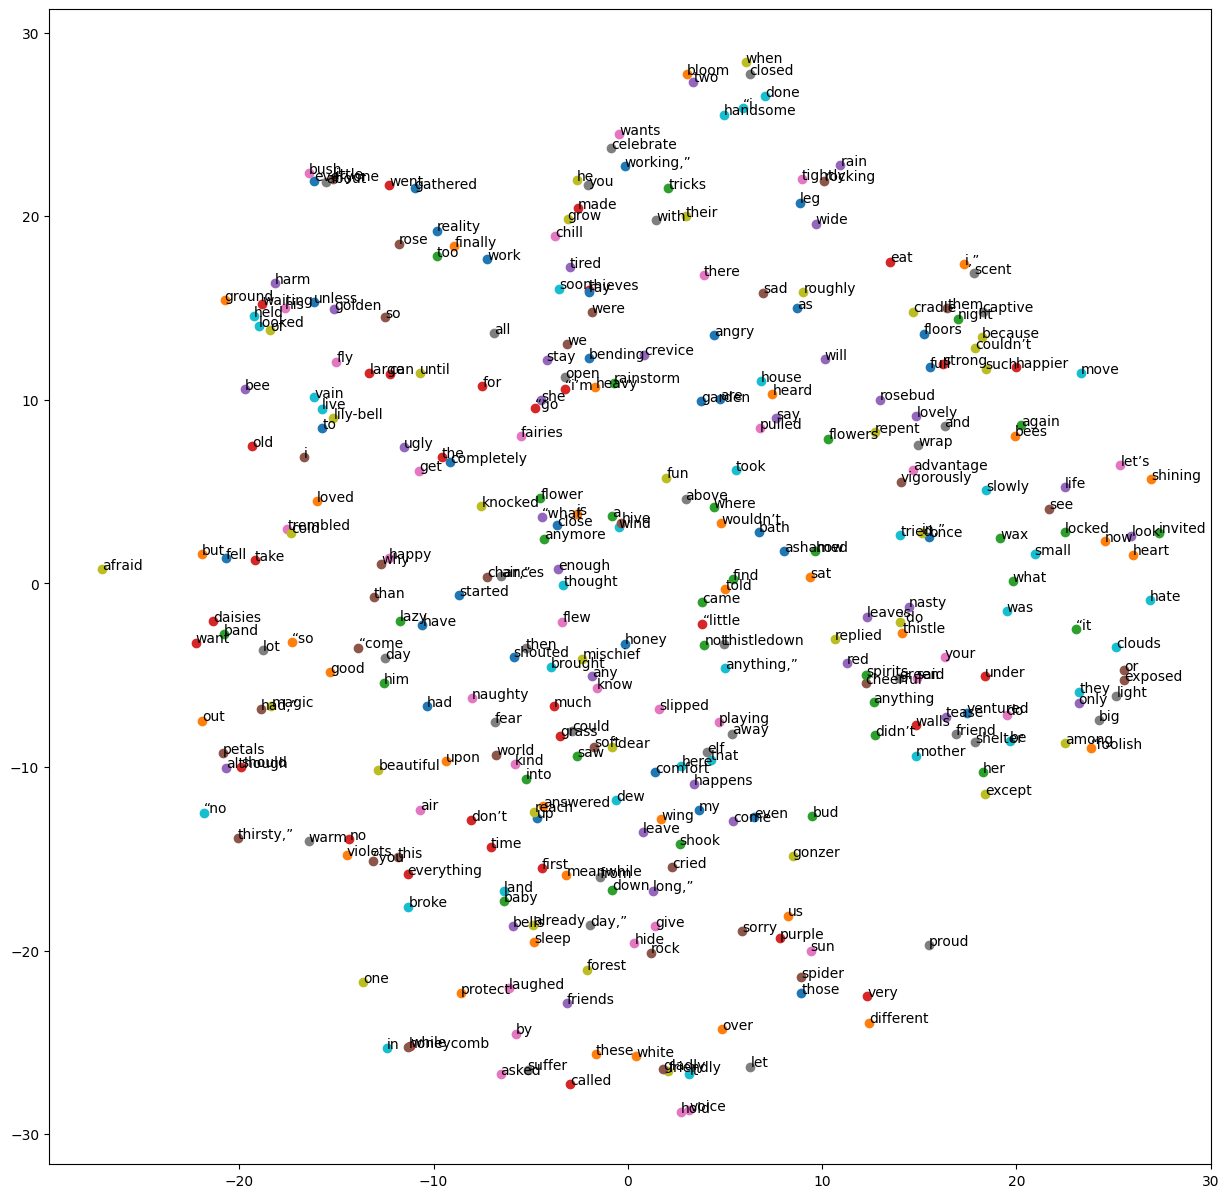

In [156]:
# Step 7: Visualize the embeddings
# Get the weights of the embeddings
embeddings = model.embeddings.weight.data.numpy()

# dimensionality reduction to 2 dimensions using t-SNE for visualization
from sklearn.manifold import TSNE
embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Plot the embeddings
fig, ax = plt.subplots(figsize=(15, 15))
# plot only half of the embeddings to keep the plot readable
for word in vocab[:int(len(vocab)/2)]:  
    embedding = embeddings[vocab.index(word)]
    plt.scatter(embedding[0], embedding[1])
    ax.annotate(word, (embedding[0], embedding[1]))

plt.show()